<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/12_tf_obj_1/Train%20With%20Validation%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/12_tf_obj_1/installation
     
 - Select the right file and run
 
     - chmod +x install_cuda10.sh && ./install_cuda10.sh

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# Only for COLAB
# Switch to TF 1.0 version (Uncomment the following line)

#%tensorflow_version 1.x

# Now reset the runetime if prompted by colab

In [ ]:
# Check TF version
import tensorflow as tf
print(tf.__version__)

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/12_tf_obj_1/installation && chmod +x install_colab.sh && ./install_colab.sh
# Restart colab runtime now

# For Local systems and cloud select the right CUDA version
# ! cd Monk_Object_Detection/12_tf_obj_1/installation && chmod +x install_cuda10.sh && ./install_cuda10.sh

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/12_tf_obj_1/lib/")

In [2]:
from train_detector import Detector

In [3]:
gtf = Detector();

In [4]:
gtf.list_models();

1. Model Name: ssd_mobilenet_v1
2. Model Name: ssd_mobilenet_v2


In [ ]:
! cp -r Monk_Object_Detection/example_notebooks/sample_dataset/ship .

## Dataset required - in Pascal VOC format

    parent_dir
        |
        |---------train
                    |
                    |--------images
                                |
                                |--------img1.jpg
                                |--------img2.jpg
                                |--------....(And so on)
                    |
                    |---------annotations
                                |
                                |--------img1.xml
                                |--------img2.xml
                                |--------....(And so on)
        |
        |---------validation
                    |
                    |--------images
                                |
                                |--------img1.jpg
                                |--------img2.jpg
                                |--------....(And so on)
                    |
                    |---------annotations
                                |
                                |--------img1.xml
                                |--------img2.xml
                                |--------....(And so on)

In [4]:
train_img_dir = "ship/images/Train";
train_anno_dir = "ship/voc/";
class_list_file = "ship/classes.txt";

gtf.set_train_dataset(train_img_dir, train_anno_dir, class_list_file, batch_size=24)
gtf.set_val_dataset(train_img_dir, train_anno_dir)

In [ ]:
# Create tf record

In [5]:
gtf.create_tfrecord(data_output_dir="data_tfrecord")

Training tfrecord already present at data_tfrecord/train.record.
Validation tfrecord already present at data_tfrecord/val.record.


In [ ]:
# Model and hyper params

In [6]:
gtf.set_model_params(model_name="ssd_mobilenet_v2")

In [7]:
gtf.set_hyper_params(num_train_steps=100000, lr=0.01)

In [ ]:
# Directory to store inference graph

In [8]:
gtf.export_params(output_directory="export_dir");

In [ ]:
# training
# tf.app.run() executes sys.exit() function hence cannot run in a jupyter notebook directory
# Run in a terminal - python Monk_Object_Detection/12_tf_obj_1/lib/train.py
# or
# Run the following command from notebook

In [9]:
%run Monk_Object_Detection/12_tf_obj_1/lib/train.py

W0808 08:15:50.352172 139991620114240 model_lib.py:758] Forced number of epochs for all eval validations to be 1.


INFO:tensorflow:Maybe overwriting train_steps: 10000


I0808 08:15:50.353615 139991620114240 config_util.py:552] Maybe overwriting train_steps: 10000


INFO:tensorflow:Maybe overwriting use_bfloat16: False


I0808 08:15:50.354497 139991620114240 config_util.py:552] Maybe overwriting use_bfloat16: False


INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1


I0808 08:15:50.355450 139991620114240 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1


INFO:tensorflow:Maybe overwriting eval_num_epochs: 1


I0808 08:15:50.356333 139991620114240 config_util.py:552] Maybe overwriting eval_num_epochs: 1


W0808 08:15:50.357240 139991620114240 model_lib.py:774] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.


INFO:tensorflow:create_estimator_and_inputs: use_tpu False, export_to_tpu None


I0808 08:15:50.358187 139991620114240 model_lib.py:809] create_estimator_and_inputs: use_tpu False, export_to_tpu None


INFO:tensorflow:Using config: {'_model_dir': 'output_dir/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f51b89b54a8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


I0808 08:15:50.361590 139991620114240 estimator.py:212] Using config: {'_model_dir': 'output_dir/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f51b89b54a8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


W0808 08:15:50.363249 139991620114240 model_fn.py:630] Estimator's model_fn (<function create_model_fn.<locals>.model_fn at 0x7f51b89b82f0>) includes params argument, but params are not passed to Estimator.


INFO:tensorflow:Not using Distribute Coordinator.


I0808 08:15:50.364905 139991620114240 estimator_training.py:186] Not using Distribute Coordinator.


INFO:tensorflow:Running training and evaluation locally (non-distributed).


I0808 08:15:50.366021 139991620114240 training.py:612] Running training and evaluation locally (non-distributed).


INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps None or save_checkpoints_secs 600.


I0808 08:15:50.367135 139991620114240 training.py:700] Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps None or save_checkpoints_secs 600.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


W0808 08:15:50.375318 139991620114240 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/tensorflow_core/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


W0808 08:15:50.415579 139991620114240 dataset_builder.py:83] num_readers has been reduced to 1 to match input file shards.


Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


W0808 08:15:50.422911 139991620114240 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/object_detection/builders/dataset_builder.py:100: parallel_interleave (from tensorflow.python.data.experimental.ops.interleave_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


Instructions for updating:
Use `tf.data.Dataset.map()


W0808 08:15:50.449719 139991620114240 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/object_detection/builders/dataset_builder.py:175: DatasetV1.map_with_legacy_function (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.map()


Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


W0808 08:16:03.724720 139991620114240 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/object_detection/inputs.py:77: sparse_to_dense (from tensorflow.python.ops.sparse_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


W0808 08:16:03.848625 139991620114240 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/object_detection/utils/ops.py:493: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


W0808 08:16:11.505728 139991620114240 api.py:332] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:1004: sample_distorted_bounding_box (from tensorflow.python.ops.image_ops_impl) is deprecated and will be removed in a future version.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


Instructions for updating:
Use `tf.cast` instead.


W0808 08:16:15.864987 139991620114240 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/object_detection/inputs.py:259: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


INFO:tensorflow:Calling model_fn.


I0808 08:16:19.816749 139991620114240 estimator.py:1148] Calling model_fn.


Instructions for updating:
Please use `layer.__call__` method instead.


W0808 08:16:20.413465 139991620114240 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.


INFO:tensorflow:depth of additional conv before box predictor: 0


I0808 08:16:23.594183 139991620114240 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0808 08:16:23.633185 139991620114240 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0808 08:16:23.671583 139991620114240 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0808 08:16:23.710346 139991620114240 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0808 08:16:23.749445 139991620114240 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0808 08:16:23.788047 139991620114240 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


W0808 08:16:31.653204 139991620114240 deprecation.py:506] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/tensorflow_core/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


INFO:tensorflow:Done calling model_fn.


I0808 08:16:39.386263 139991620114240 estimator.py:1150] Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


I0808 08:16:39.389305 139991620114240 basic_session_run_hooks.py:541] Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


I0808 08:16:44.488264 139991620114240 monitored_session.py:240] Graph was finalized.


INFO:tensorflow:Running local_init_op.


I0808 08:16:52.063249 139991620114240 session_manager.py:500] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0808 08:16:52.584750 139991620114240 session_manager.py:502] Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into output_dir/model.ckpt.


I0808 08:17:05.945955 139991620114240 basic_session_run_hooks.py:606] Saving checkpoints for 0 into output_dir/model.ckpt.


INFO:tensorflow:loss = 56.64562, step = 0


I0808 08:17:23.878762 139991620114240 basic_session_run_hooks.py:262] loss = 56.64562, step = 0


INFO:tensorflow:global_step/sec: 2.89904


I0808 08:17:58.372084 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 2.89904


INFO:tensorflow:loss = 19.035898, step = 100 (34.496 sec)


I0808 08:17:58.374248 139991620114240 basic_session_run_hooks.py:260] loss = 19.035898, step = 100 (34.496 sec)


INFO:tensorflow:global_step/sec: 3.64612


I0808 08:18:25.798496 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.64612


INFO:tensorflow:loss = 16.82699, step = 200 (27.427 sec)


I0808 08:18:25.800800 139991620114240 basic_session_run_hooks.py:260] loss = 16.82699, step = 200 (27.427 sec)


INFO:tensorflow:global_step/sec: 3.64784


I0808 08:18:53.211954 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.64784


INFO:tensorflow:loss = 14.814317, step = 300 (27.413 sec)


I0808 08:18:53.214259 139991620114240 basic_session_run_hooks.py:260] loss = 14.814317, step = 300 (27.413 sec)


INFO:tensorflow:global_step/sec: 3.64574


I0808 08:19:20.641270 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.64574


INFO:tensorflow:loss = 13.407907, step = 400 (27.429 sec)


I0808 08:19:20.643748 139991620114240 basic_session_run_hooks.py:260] loss = 13.407907, step = 400 (27.429 sec)


INFO:tensorflow:global_step/sec: 3.64163


I0808 08:19:48.101453 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.64163


INFO:tensorflow:loss = 13.547591, step = 500 (27.460 sec)


I0808 08:19:48.103894 139991620114240 basic_session_run_hooks.py:260] loss = 13.547591, step = 500 (27.460 sec)


INFO:tensorflow:global_step/sec: 3.65407


I0808 08:20:15.468227 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.65407


INFO:tensorflow:loss = 11.684266, step = 600 (27.367 sec)


I0808 08:20:15.470440 139991620114240 basic_session_run_hooks.py:260] loss = 11.684266, step = 600 (27.367 sec)


INFO:tensorflow:global_step/sec: 3.64004


I0808 08:20:42.940480 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.64004


INFO:tensorflow:loss = 11.214173, step = 700 (27.472 sec)


I0808 08:20:42.942635 139991620114240 basic_session_run_hooks.py:260] loss = 11.214173, step = 700 (27.472 sec)


INFO:tensorflow:global_step/sec: 3.63897


I0808 08:21:10.420754 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.63897


INFO:tensorflow:loss = 11.28521, step = 800 (27.481 sec)


I0808 08:21:10.423177 139991620114240 basic_session_run_hooks.py:260] loss = 11.28521, step = 800 (27.481 sec)


INFO:tensorflow:global_step/sec: 3.64916


I0808 08:21:37.824360 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.64916


INFO:tensorflow:loss = 9.0577345, step = 900 (27.404 sec)


I0808 08:21:37.826683 139991620114240 basic_session_run_hooks.py:260] loss = 9.0577345, step = 900 (27.404 sec)


INFO:tensorflow:global_step/sec: 3.64535


I0808 08:22:05.256577 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.64535


INFO:tensorflow:loss = 8.816834, step = 1000 (27.432 sec)


I0808 08:22:05.258870 139991620114240 basic_session_run_hooks.py:260] loss = 8.816834, step = 1000 (27.432 sec)


INFO:tensorflow:global_step/sec: 3.61878


I0808 08:22:32.890161 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.61878


INFO:tensorflow:loss = 9.528055, step = 1100 (27.634 sec)


I0808 08:22:32.892469 139991620114240 basic_session_run_hooks.py:260] loss = 9.528055, step = 1100 (27.634 sec)


INFO:tensorflow:global_step/sec: 3.64333


I0808 08:23:00.337602 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.64333


INFO:tensorflow:loss = 8.474141, step = 1200 (27.448 sec)


I0808 08:23:00.339979 139991620114240 basic_session_run_hooks.py:260] loss = 8.474141, step = 1200 (27.448 sec)


INFO:tensorflow:global_step/sec: 3.64402


I0808 08:23:27.779828 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.64402


INFO:tensorflow:loss = 8.283641, step = 1300 (27.442 sec)


I0808 08:23:27.782270 139991620114240 basic_session_run_hooks.py:260] loss = 8.283641, step = 1300 (27.442 sec)


INFO:tensorflow:global_step/sec: 3.6502


I0808 08:23:55.175572 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.6502


INFO:tensorflow:loss = 7.689953, step = 1400 (27.396 sec)


I0808 08:23:55.177858 139991620114240 basic_session_run_hooks.py:260] loss = 7.689953, step = 1400 (27.396 sec)


INFO:tensorflow:global_step/sec: 3.66439


I0808 08:24:22.465256 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.66439


INFO:tensorflow:loss = 8.578789, step = 1500 (27.290 sec)


I0808 08:24:22.467534 139991620114240 basic_session_run_hooks.py:260] loss = 8.578789, step = 1500 (27.290 sec)


INFO:tensorflow:global_step/sec: 3.63511


I0808 08:24:49.974743 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.63511


INFO:tensorflow:loss = 9.33555, step = 1600 (27.509 sec)


I0808 08:24:49.976833 139991620114240 basic_session_run_hooks.py:260] loss = 9.33555, step = 1600 (27.509 sec)


INFO:tensorflow:global_step/sec: 3.65701


I0808 08:25:17.319490 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.65701


INFO:tensorflow:loss = 7.081193, step = 1700 (27.345 sec)


I0808 08:25:17.321780 139991620114240 basic_session_run_hooks.py:260] loss = 7.081193, step = 1700 (27.345 sec)


INFO:tensorflow:global_step/sec: 3.65817


I0808 08:25:44.655561 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.65817


INFO:tensorflow:loss = 7.5923157, step = 1800 (27.336 sec)


I0808 08:25:44.658163 139991620114240 basic_session_run_hooks.py:260] loss = 7.5923157, step = 1800 (27.336 sec)


INFO:tensorflow:global_step/sec: 3.64975


I0808 08:26:12.054675 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.64975


INFO:tensorflow:loss = 7.0858283, step = 1900 (27.399 sec)


I0808 08:26:12.056822 139991620114240 basic_session_run_hooks.py:260] loss = 7.0858283, step = 1900 (27.399 sec)


INFO:tensorflow:global_step/sec: 3.64431


I0808 08:26:39.494692 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.64431


INFO:tensorflow:loss = 6.714818, step = 2000 (27.440 sec)


I0808 08:26:39.497023 139991620114240 basic_session_run_hooks.py:260] loss = 6.714818, step = 2000 (27.440 sec)


INFO:tensorflow:global_step/sec: 3.6675


I0808 08:27:06.761182 139991620114240 basic_session_run_hooks.py:692] global_step/sec: 3.6675


INFO:tensorflow:loss = 7.296426, step = 2100 (27.267 sec)


I0808 08:27:06.764053 139991620114240 basic_session_run_hooks.py:260] loss = 7.296426, step = 2100 (27.267 sec)


INFO:tensorflow:Saving checkpoints for 2114 into output_dir/model.ckpt.


I0808 08:27:10.337933 139991620114240 basic_session_run_hooks.py:606] Saving checkpoints for 2114 into output_dir/model.ckpt.


INFO:tensorflow:Calling model_fn.


I0808 08:27:13.588820 139991620114240 estimator.py:1148] Calling model_fn.


INFO:tensorflow:depth of additional conv before box predictor: 0


I0808 08:27:16.209660 139991620114240 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0808 08:27:16.247124 139991620114240 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0808 08:27:16.283647 139991620114240 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0808 08:27:16.320310 139991620114240 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0808 08:27:16.356931 139991620114240 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0808 08:27:16.393590 139991620114240 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


Instructions for updating:
Use `tf.cast` instead.


W0808 08:27:17.333644 139991620114240 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/object_detection/eval_util.py:855: to_int64 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


W0808 08:27:17.573261 139991620114240 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/object_detection/utils/visualization_utils.py:618: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


INFO:tensorflow:Done calling model_fn.


I0808 08:27:18.210181 139991620114240 estimator.py:1150] Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-08-08T08:27:18Z


I0808 08:27:18.231873 139991620114240 evaluation.py:255] Starting evaluation at 2020-08-08T08:27:18Z


INFO:tensorflow:Graph was finalized.


I0808 08:27:18.752416 139991620114240 monitored_session.py:240] Graph was finalized.


INFO:tensorflow:Restoring parameters from output_dir/model.ckpt-2114


I0808 08:27:18.758265 139991620114240 saver.py:1284] Restoring parameters from output_dir/model.ckpt-2114


INFO:tensorflow:Running local_init_op.


I0808 08:27:20.103376 139991620114240 session_manager.py:500] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0808 08:27:20.255753 139991620114240 session_manager.py:502] Done running local_init_op.


INFO:tensorflow:Performing evaluation on 750 images.


I0808 08:27:51.900564 139984979875584 coco_evaluation.py:237] Performing evaluation on 750 images.


creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...


I0808 08:27:51.916338 139984979875584 coco_tools.py:116] Loading and preparing annotation results...


INFO:tensorflow:DONE (t=0.07s)


I0808 08:27:51.988880 139984979875584 coco_tools.py:138] DONE (t=0.07s)


creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=3.95s).
Accumulating evaluation results...
DONE (t=0.75s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50

I0808 08:27:56.878068 139991620114240 evaluation.py:275] Finished evaluation at 2020-08-08-08:27:56


INFO:tensorflow:Saving dict for global step 2114: DetectionBoxes_Precision/mAP = 0.0, DetectionBoxes_Precision/mAP (large) = 0.0, DetectionBoxes_Precision/mAP (medium) = 0.0, DetectionBoxes_Precision/mAP (small) = 0.0, DetectionBoxes_Precision/mAP@.50IOU = 0.0, DetectionBoxes_Precision/mAP@.75IOU = 0.0, DetectionBoxes_Recall/AR@1 = 0.0, DetectionBoxes_Recall/AR@10 = 0.0, DetectionBoxes_Recall/AR@100 = 0.0, DetectionBoxes_Recall/AR@100 (large) = 0.0, DetectionBoxes_Recall/AR@100 (medium) = 0.0, DetectionBoxes_Recall/AR@100 (small) = 0.0, Loss/classification_loss = 16.474455, Loss/localization_loss = 2.9580872, Loss/regularization_loss = 0.29639867, Loss/total_loss = 19.728971, global_step = 2114, learning_rate = 1e-04, loss = 19.728971


I0808 08:27:56.879633 139991620114240 estimator.py:2049] Saving dict for global step 2114: DetectionBoxes_Precision/mAP = 0.0, DetectionBoxes_Precision/mAP (large) = 0.0, DetectionBoxes_Precision/mAP (medium) = 0.0, DetectionBoxes_Precision/mAP (small) = 0.0, DetectionBoxes_Precision/mAP@.50IOU = 0.0, DetectionBoxes_Precision/mAP@.75IOU = 0.0, DetectionBoxes_Recall/AR@1 = 0.0, DetectionBoxes_Recall/AR@10 = 0.0, DetectionBoxes_Recall/AR@100 = 0.0, DetectionBoxes_Recall/AR@100 (large) = 0.0, DetectionBoxes_Recall/AR@100 (medium) = 0.0, DetectionBoxes_Recall/AR@100 (small) = 0.0, Loss/classification_loss = 16.474455, Loss/localization_loss = 2.9580872, Loss/regularization_loss = 0.29639867, Loss/total_loss = 19.728971, global_step = 2114, learning_rate = 1e-04, loss = 19.728971


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2114: output_dir/model.ckpt-2114


I0808 08:27:58.039460 139991620114240 estimator.py:2109] Saving 'checkpoint_path' summary for global step 2114: output_dir/model.ckpt-2114


KeyboardInterrupt: 

In [ ]:
# exportaing trained model
# tf.app.run() executes sys.exit() function hence cannot run in a jupyter notebook directory
# Run in a terminal - python Monk_Object_Detection/12_tf_obj_1/lib/export.py
# or
# Run the following command from notebook

In [1]:
%run Monk_Object_Detection/12_tf_obj_1/lib/export.py

Instructions for updating:
Please use `layer.__call__` method instead.


W0809 03:21:55.981051 140490331436864 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.


INFO:tensorflow:depth of additional conv before box predictor: 0


I0809 03:21:58.749853 140490331436864 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0809 03:21:58.798122 140490331436864 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0809 03:21:58.846395 140490331436864 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0809 03:21:58.894093 140490331436864 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0809 03:21:58.941837 140490331436864 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0809 03:21:58.989824 140490331436864 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


W0809 03:21:59.298662 140490331436864 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/object_detection/core/post_processing.py:583: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Please switch to tf.train.get_or_create_global_step


W0809 03:21:59.846633 140490331436864 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/object_detection/exporter.py:474: get_or_create_global_step (from tf_slim.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.get_or_create_global_step


Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_log, cmd, options)`. Build `options` with `tf.profiler.ProfileOptionBuilder`. See README.md for details


W0809 03:21:59.852583 140490331436864 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/object_detection/exporter.py:653: print_model_analysis (from tensorflow.contrib.tfprof.model_analyzer) is deprecated and will be removed after 2018-01-01.
Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_log, cmd, options)`. Build `options` with `tf.profiler.ProfileOptionBuilder`. See README.md for details


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


W0809 03:21:59.855096 140490331436864 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/tensorflow_core/python/profiler/internal/flops_registry.py:142: tensor_shape_from_node_def_name (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
145 ops no flops stats due to incomplete shapes.
145 ops no flops stats due to incomplete shapes.


INFO:tensorflow:Restoring parameters from output_dir/model.ckpt-100000


I0809 03:22:03.477219 140490331436864 saver.py:1284] Restoring parameters from output_dir/model.ckpt-100000


Instructions for updating:
Use standard file APIs to check for files with this prefix.


W0809 03:22:05.806265 140490331436864 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/tensorflow_core/python/tools/freeze_graph.py:127: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from output_dir/model.ckpt-100000


I0809 03:22:06.719977 140490331436864 saver.py:1284] Restoring parameters from output_dir/model.ckpt-100000


Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`


W0809 03:22:07.658866 140490331436864 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/tensorflow_core/python/tools/freeze_graph.py:233: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


W0809 03:22:07.660696 140490331436864 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/tensorflow_core/python/framework/graph_util_impl.py:277: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


INFO:tensorflow:Froze 344 variables.


I0809 03:22:08.161796 140490331436864 graph_util_impl.py:334] Froze 344 variables.


INFO:tensorflow:Converted 344 variables to const ops.


I0809 03:22:08.250136 140490331436864 graph_util_impl.py:394] Converted 344 variables to const ops.


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


W0809 03:22:08.950158 140490331436864 deprecation.py:323] From /home/ubuntu/.virtualenvs/tf2/lib/python3.6/site-packages/object_detection/exporter.py:384: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


INFO:tensorflow:No assets to save.


I0809 03:22:08.952796 140490331436864 builder_impl.py:640] No assets to save.


INFO:tensorflow:No assets to write.


I0809 03:22:08.953984 140490331436864 builder_impl.py:460] No assets to write.


INFO:tensorflow:SavedModel written to: export_dir/saved_model/saved_model.pb


I0809 03:22:09.337851 140490331436864 builder_impl.py:425] SavedModel written to: export_dir/saved_model/saved_model.pb


INFO:tensorflow:Writing pipeline config file to export_dir/pipeline.config


I0809 03:22:09.371701 140490331436864 config_util.py:254] Writing pipeline config file to export_dir/pipeline.config


In [ ]:
# Inference

In [5]:
import os
import sys
sys.path.append("Monk_Object_Detection/12_tf_obj_1/lib/")

In [6]:
from infer_detector import Infer

In [7]:
gtf = Infer();

In [8]:
gtf.set_model_params('export_dir/frozen_inference_graph.pb', "ship/classes.txt")

Instructions for updating:
Use tf.gfile.GFile.




In [9]:
ls ship/test

img1.jpg  img2.jpg  img3.jpg  img4.jpg  img5.jpg  img6.jpg


Image loaded in 0.010532855987548828 sec
Predicted in 0.012490510940551758 sec
Inference printed on image in 0.0805666446685791 sec


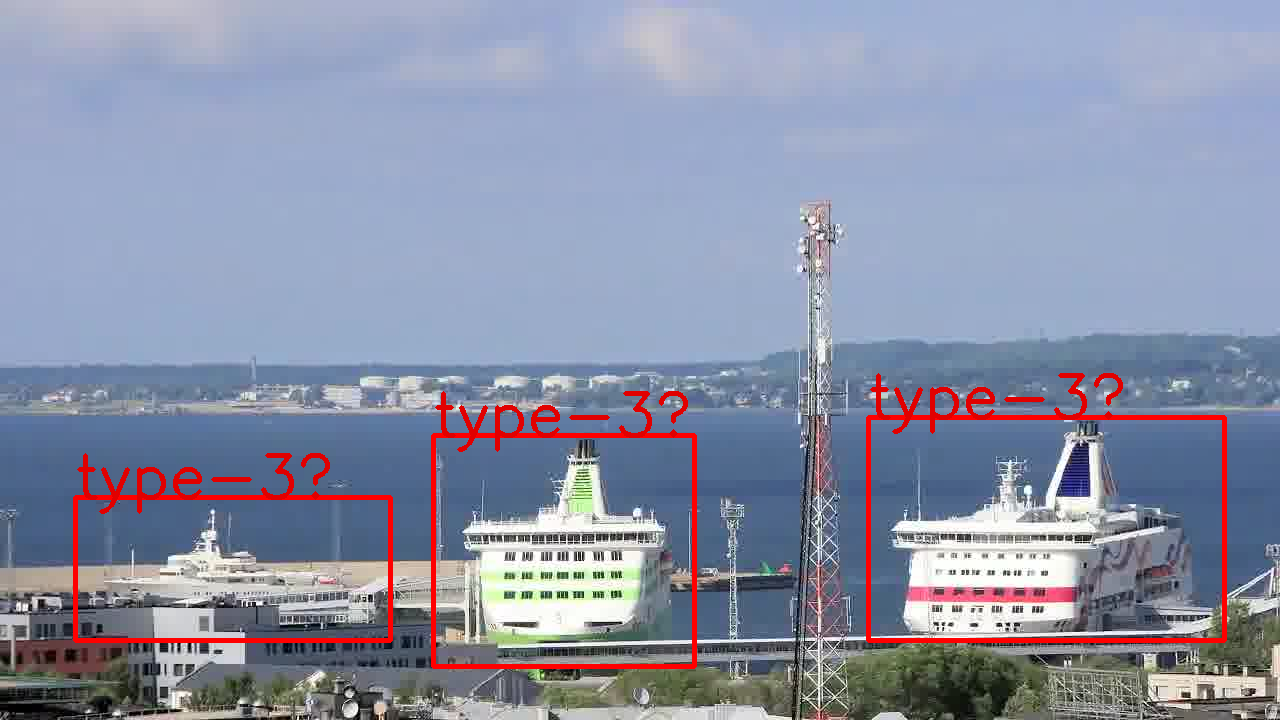

In [12]:
scores, bboxes, labels = gtf.infer_on_image('ship/test/img1.jpg', thresh=0.1, 
                                            bbox_thickness=3, text_size=2, text_thickness=4);
from IPython.display import Image
Image(filename='output.png') 

Image loaded in 0.010485649108886719 sec
Predicted in 0.012203216552734375 sec
Inference printed on image in 0.043399810791015625 sec


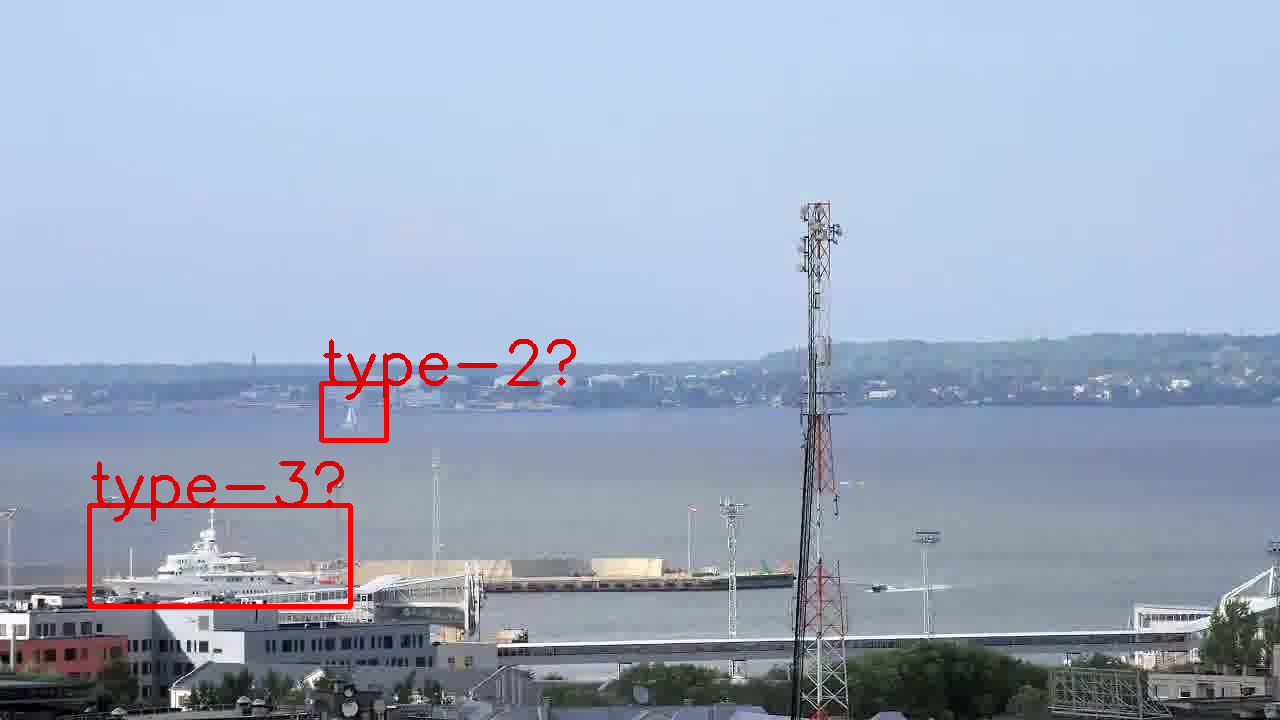

In [13]:
scores, bboxes, labels = gtf.infer_on_image('ship/test/img5.jpg', thresh=0.1, 
                                            bbox_thickness=3, text_size=2, text_thickness=4);
from IPython.display import Image
Image(filename='output.png') 